# Multiple Linear Regression

In [41]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

In [42]:
df = pd.read_csv("train.csv")

In [60]:
features = ["LotArea","LotFrontage","TotalBsmtSF","GrLivArea","SaleCondition","SalePrice"]
mydf = df[features]
mydf.dropna()
mydf.reset_index(inplace=True, drop=True)
mydf.head()

,LotArea,LotFrontage,TotalBsmtSF,GrLivArea,SaleCondition,SalePrice
0,8450,65.0,856,1710,Normal,208500
1,9600,80.0,1262,1262,Normal,181500
2,11250,68.0,920,1786,Normal,223500
3,9550,60.0,756,1717,Abnorml,140000
4,14260,84.0,1145,2198,Normal,250000


C:\Users\Mahyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


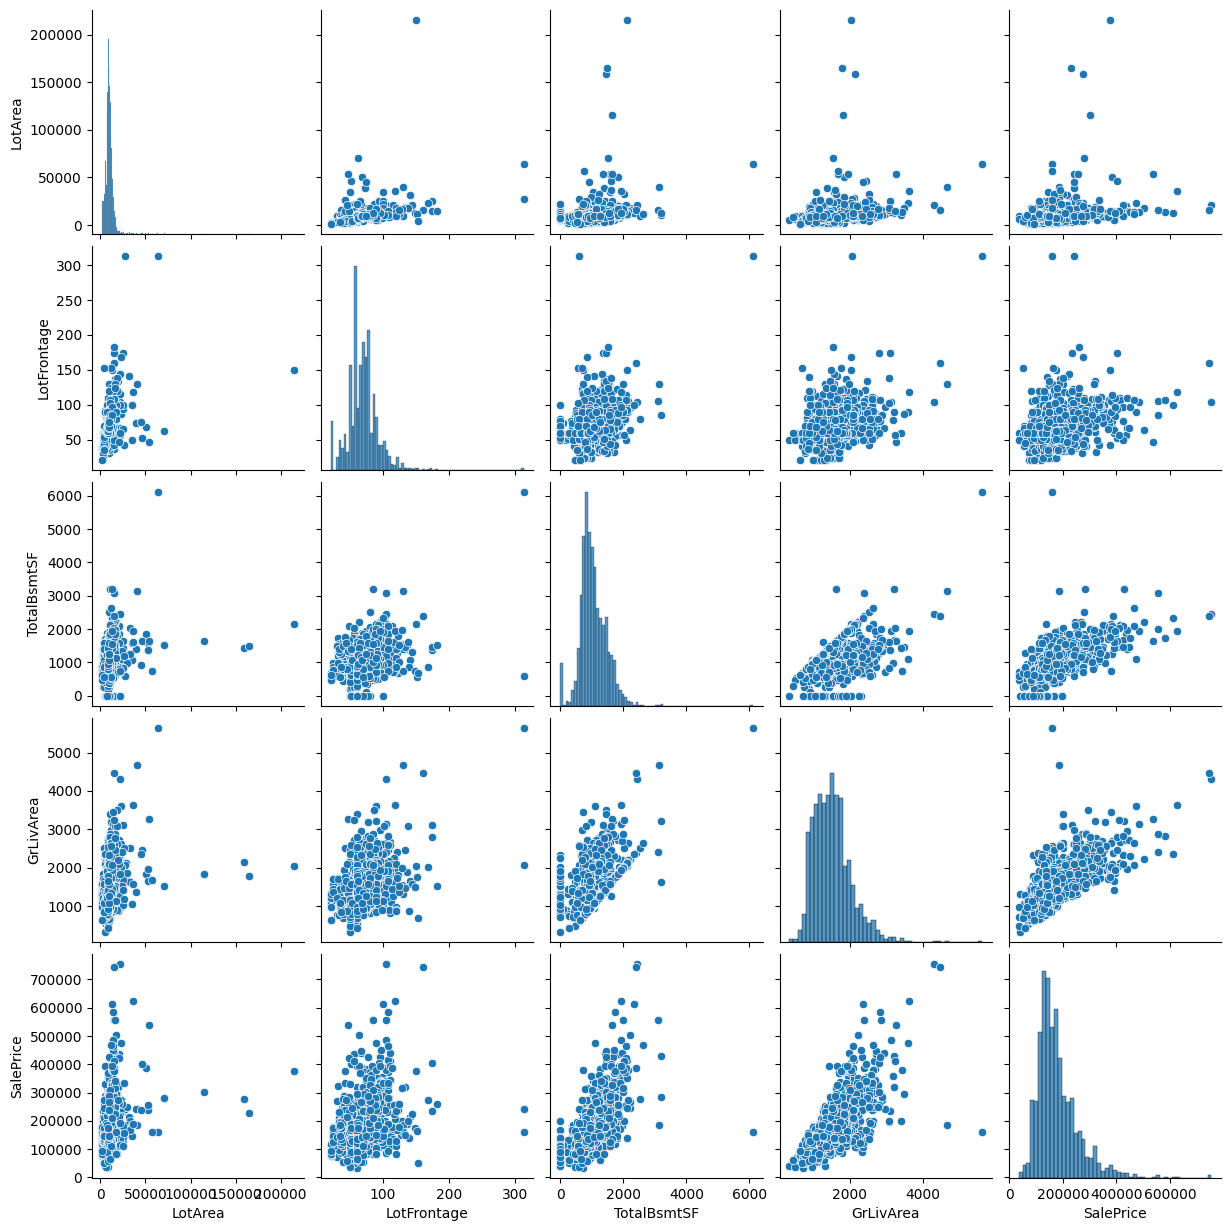

In [61]:
sns.pairplot(mydf)

In [62]:
# be careful about two parantesies
X_mydf = mydf[["LotArea","LotFrontage","TotalBsmtSF","GrLivArea","SaleCondition"]]
Y_mydf = mydf[["SalePrice"]]

In [63]:
# test_size: proportion of data you are randomly assign to the holdout dataset
# test_size = 0.3 : in this case you are holding back 30% of the data to test the model
# depending on the context it may be appropriate to hold back more or less of the data

# random_state = 42 : it's the standard

x_train, x_test, y_train, y_test = train_test_split(X_mydf, Y_mydf, test_size = 0.9, random_state = 42)


In [69]:
ols_formula = "LotArea ~ LotFrontage + TotalBsmtSF + GrLivArea + C(SaleCondition) "

In [70]:
ols_data = pd.concat([x_train, y_train], axis = 1)

In [71]:
OLS = ols(formula = ols_formula, data = ols_data)

In [72]:
model = OLS.fit()

In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LotArea   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     4.677
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           5.86e-05
Time:                        17:15:35   Log-Likelihood:                -1198.2
No. Observations:                 121   AIC:                             2414.
Df Residuals:                     112   BIC:                             2440.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    -562.9674   2670.366     -0.211      0.833   -5853.955    4728.021
C(SaleCondition)[T.AdjLand]   417.3790   5344.008      0.078      0.938   -1.02e+04     1.1e+04
C(SaleCondition)[T.Alloca]  -6372.0240   5753.635     -1.107      0.270   -1.78e+04    5028.066
C(SaleCondition)[T.Family]    788.6520   5334.502      0.148      0.883   -9780.980    1.14e+04
C(SaleCondition)[T.Normal]   -271.0531   1865.948     -0.145      0.885   -3968.190    3426.084
C(SaleCondition)[T.Partial]  -984.5704   2213.518     -0.445      0.657   -5370.372    3401.231
LotFrontage                    24.4667     23.456      1.043      0.299     -22.009      70.942
TotalBsmtSF                     0.7495      1.367      0.548      0.584      -1.958       3.457
GrLivArea                       5.5300      1.151      4.806      0.000       3.250       7.810
==============================================================================
Omnibus:                      135.862   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3007.056
Skew:                           3.932   Prob(JB):                         0.00
Kurtosis:                      26.122   Cond. No.                     2.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""